# Step 1: Import necessary libraries

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
import pandas as pd

# Step 2: Check the current working directory

In [2]:
import os
print(os.getcwd())

c:\Users\afif.baharun\OneDrive - cgcmb\Machine Learning Repository\LoanDefaultAndRepaymentForecast\notebook


# Step 3: Load the dataset

In [3]:
# Load dataset
df_default = pd.read_csv(r"c:\Users\afif.baharun\OneDrive - cgcmb\Machine Learning Repository\LoanDefaultAndRepaymentForecast\dataset\loan_default_data.csv")

# Step 4: Feature selection and preprocessing

In [4]:
# Feature selection
df_default.columns = df_default.columns.str.strip()  # Strip any leading/trailing spaces from column names
X_default = df_default.drop(columns=['LoanDefault'])
y_default = df_default['LoanDefault']

# Step 5: Split the dataset into training and testing sets

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_default, y_default, test_size=0.2, random_state=42)

# Step 6: Train a Random Forest model

In [6]:
# Model training
model_default = RandomForestClassifier(n_estimators=100, random_state=42)
model_default.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Step 7: Train a Gradient Boosting model

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

# Step 8: Train an XGBoost model

In [8]:
from xgboost import XGBClassifier

# XGBoost Classifier
model_xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

c:\Users\afif.baharun\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:09:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

# Step 9: Evaluate the models

In [9]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Evaluate Random Forest
y_pred_rf = model_default.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, model_default.predict_proba(X_test)[:, 1])

# Evaluate Gradient Boosting
y_pred_gb = model_gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, model_gb.predict_proba(X_test)[:, 1])

# Evaluate XGBoost
y_pred_xgb = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1])

# Step 10: Compare model performance

In [10]:
# Store results in a dictionary for comparison
model_results = {
    "Random Forest": {"Accuracy": accuracy_rf, "F1": f1_rf, "AUC-ROC": roc_auc_rf},
    "Gradient Boosting": {"Accuracy": accuracy_gb, "F1": f1_gb, "AUC-ROC": roc_auc_gb},
    "XGBoost": {"Accuracy": accuracy_xgb, "F1": f1_xgb, "AUC-ROC": roc_auc_xgb},
}

# Print results in a formatted way
print("\nModel Comparison:")
for model, metrics in model_results.items():
    print(f"{model}: Accuracy = {metrics['Accuracy']:.4f}, F1 = {metrics['F1']:.4f}, AUC-ROC = {metrics['AUC-ROC']:.4f}")



Model Comparison:
Random Forest: Accuracy = 0.6905, F1 = 0.8001, AUC-ROC = 0.6647
Gradient Boosting: Accuracy = 0.7130, F1 = 0.8190, AUC-ROC = 0.6994
XGBoost: Accuracy = 0.6915, F1 = 0.7974, AUC-ROC = 0.6530


# Step 11: Plot AUC-ROC curves

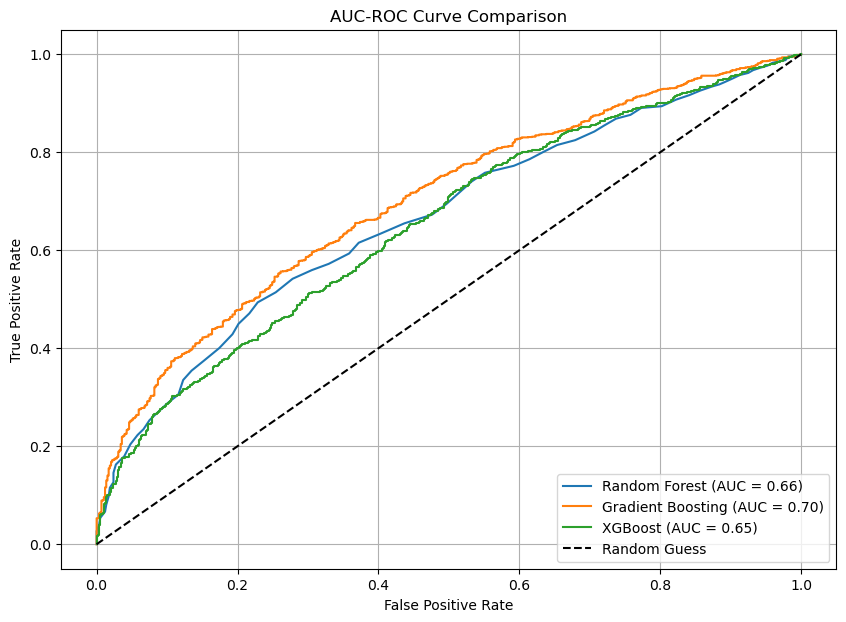

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Plot AUC-ROC curves for each model
plt.figure(figsize=(10, 7))

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, model_default.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")

# Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, model_gb.predict_proba(X_test)[:, 1])
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_gb:.2f})")

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, model_xgb.predict_proba(X_test)[:, 1])
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("AUC-ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Step 12: Choose the best model based on AUC-ROC

In [12]:

# Choose the best model based on AUC-ROC
best_model_name = max(model_results, key=lambda x: model_results[x]["AUC-ROC"])
best_model_metrics = model_results[best_model_name]

print(f"\nThe best model is {best_model_name} with AUC-ROC = {best_model_metrics['AUC-ROC']:.4f}.")


The best model is Gradient Boosting with AUC-ROC = 0.6994.


# Step 13: Save the best model

In [13]:
# Save the model
joblib.dump(model_gb, r"c:\Users\afif.baharun\OneDrive - cgcmb\Machine Learning Repository\LoanDefaultAndRepaymentForecast\model\loan_default_model.pkl")

['c:\\Users\\afif.baharun\\OneDrive - cgcmb\\Machine Learning Repository\\LoanDefaultAndRepaymentForecast\\model\\loan_default_model.pkl']